##Actividad Individual 3 Módulo 3##


Ejercicios planteados

Caso:

Se tiene un fichero csv con información relativa a datos de un estudio realizado en la zona de Boston, donde se analizan diferentes variables, como son el índice de crimen, el número de habitaciones, el porcentaje de habitantes de clase baja y el valor medio de las casas de esa zona.

Pasos:

● Importar librerías a utilizar para el caso en cuestión (panda, matplotlib)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

● Leer csv correspondiente.

In [29]:
casasboston_df = pd.read_csv('/content/HousingData.csv')

Variables in order:

 CRIM     = per capita crime rate by town

 ZN       = proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS    = proportion of non-retail business acres per town

 CHAS     = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX      = nitric oxides concentration (parts per 10 million)

 RM       = average number of rooms per dwelling

 AGE      = proportion of owner-occupied units built prior to 1940

 DIS      = weighted distances to five Boston employment centres

 RAD      = index of accessibility to radial highways

 TAX      = full-value property-tax rate per $10,000

 PTRATIO  = pupil-teacher ratio by town

 B        = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 LSTAT    = % lower status of the population

 MEDV     = Median value of owner-occupied homes in $1000's


● Renombrar campos.

In [30]:
# cambia nombres de columnas a minusculas
casasboston_df.columns=[i.lower() for i in casasboston_df.columns]

In [31]:
# renombra los nombres de la columnas
casasboston_df.rename(columns = {
    "crim":"tasa_criminalidad",
    "zn":"suelo_residencial_zonif_25000",
    "indus":"acres_comerciales",
    "chas":"variable_Charles_River",
    "nox":"Concentración_oxidos_nitrico",
    "rm":"promedio_cuartos_vivienda",
    "age":"unidades_ocupadas_antes_1940",
    "dis":"Dist_pond_5_centros_empleo",
    "rad":"acces_carreteras_radiales",
    "tax":"Tasa_impuesto_propiedad_c_10000",
    "ptratio":"ratio_alumno_profesor",
    "b":"propor_negros_ciudad",
    "lstat":"%_estatus_social_inferior",
    "medv":"media_valor_viviendas"
    }, inplace=True)

● Confeccionar los siguientes Gráficos

o Histograma:
 
Un histograma es útil para ver la distribución de una variable, es decir, nos permite ver los valores más comunes. Para el caso que se presenta se desea ver la distribución de la cantidad media de habitaciones en el estudio realizado.

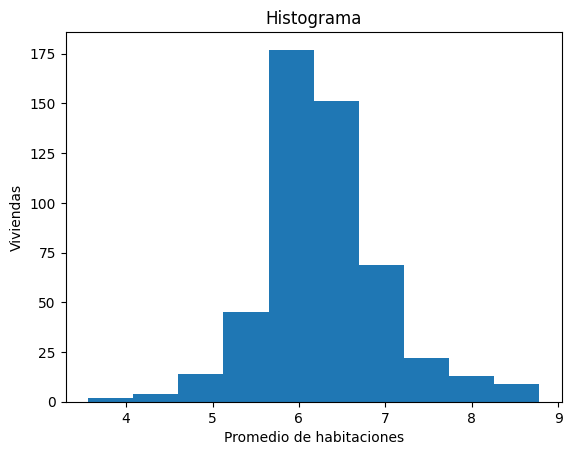

In [32]:
x = casasboston_df.promedio_cuartos_vivienda
fig, ax = plt.subplots()
ax.hist(x)
ax.set_xlabel('Promedio de habitaciones')
ax.set_ylabel('Viviendas')
ax.set_title("Histograma")
plt.show()

o Dispersión: 

sirve para representar la relación entre dos variables. Para nuestro caso se desea ver la relación entre índice de crimen y el valor mediano de las casas. En otras palabras, ¿el índice de crimen afecta el valor medio de las casas?

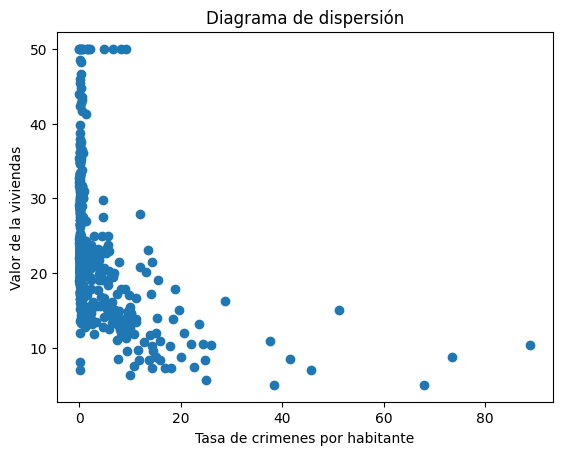

In [34]:
x = casasboston_df.tasa_criminalidad
y = casasboston_df.media_valor_viviendas
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('Tasa de crimenes por habitante')
ax.set_ylabel('Valor de la viviendas')
ax.set_title("Diagrama de dispersión")
plt.show()

o Barras: 

Un gráfico de barras es útil para comparar una variable entre distintos grupos o categorías. Por ejemplo, si quisiéramos observar el valor medio de cada ciudad. Para nuestro caso se desea agrupar por ciudad y toma la media del valor mediano. Gráfica las 10 primeras ciudades.

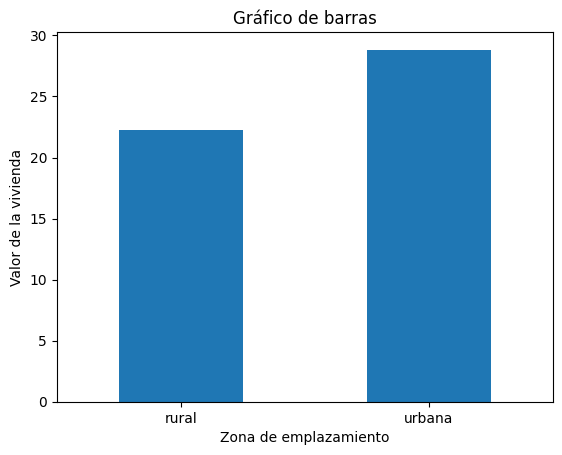

In [38]:
fig, ax = plt.subplots()
casasboston_df.groupby('variable_Charles_River')['media_valor_viviendas'].mean().plot(kind='bar', ax=ax)
ax.set_xlabel('Zona de emplazamiento')
ax.set_ylabel('Valor de la vivienda')
ax.set_title("Gráfico de barras")
ax.set_xticklabels(['rural', 'urbana'])
plt.xticks(rotation=0)
plt.show()

o Cajas: 

Los diagramas de cajas son útiles para representar grupos de datos y compararlos entre ellos. Otro uso importante es que nos permiten identificar de forma sencilla si una variable tiene muchos outliers (valores atípicos) esto es, elementos que se alejan de los valores frecuentes de dicha variable. Para nuestro caso, se desea ver los valores atípicos de índice de crimen en los diferentes cuantiles de valor mediano.

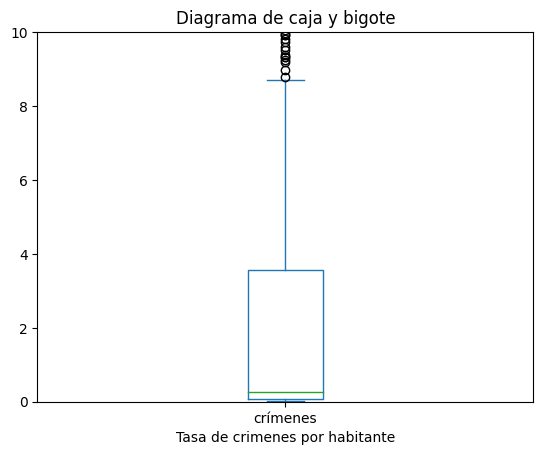

In [36]:
fig, ax = plt.subplots()
casasboston_df.tasa_criminalidad.plot(kind='box', ax=ax)
ax.set_xlabel('Tasa de crimenes por habitante')
ax.set_title("Diagrama de caja y bigote")
ax.set_xticklabels(['crímenes'])
ax.set_ylim(0,10)
plt.show()